In [33]:
import pandas as pd

data = "data.csv"

read = pd.read_csv(data)

print(read)

    age  experience   rank  nation   go
0    36           10      9     uk   no
1    42           12      4    usa   no
2    23            4      6      n   no
3    52            4      4    usa   no
4    43           21      8    usa  yes
5    44           14      5     uk   no
6    66            3      7      n  yes
7    35           14      9     uk  yes
8    52           13      7      n  yes
9    35            5      9      n  yes
10   24            3      5    usa   no
11   18            3      7     uk  yes
12   45            9      9     uk  yes


In [34]:
d = {"uk": 0, "usa": 1, "n": 2}

read["nation"] = read["nation"].map(d)

In [35]:
d = {"yes": 1, "no": 0}

read["go"] = read["go"].map(d)

In [36]:
print(read)

    age  experience   rank   nation  go
0    36           10      9       0   0
1    42           12      4       1   0
2    23            4      6       2   0
3    52            4      4       1   0
4    43           21      8       1   1
5    44           14      5       0   0
6    66            3      7       2   1
7    35           14      9       0   1
8    52           13      7       2   1
9    35            5      9       2   1
10   24            3      5       1   0
11   18            3      7       0   1
12   45            9      9       0   1


In [37]:
features = ['age', 'nation', 'go']

# features = ['x', 'y']

X = read[features]
y = read['go']

print("x:\n", X)
print("\ny:")
print(y)

x:
     age  nation  go
0    36       0   0
1    42       1   0
2    23       2   0
3    52       1   0
4    43       1   1
5    44       0   0
6    66       2   1
7    35       0   1
8    52       2   1
9    35       2   1
10   24       1   0
11   18       0   1
12   45       0   1

y:
0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: go, dtype: int64


In [38]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [39]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [40]:
import sys
import matplotlib
#import matplotlib.style
matplotlib.use('Agg')
from sklearn.tree import plot_tree, export_text

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)


features = ['age', 'nation', 'go']

# features = ['x', 'y']

plt.figure(figsize=(8, 6))
plot_tree(dtree, feature_names=features, filled=True)


# tree.plot_tree(dtree, feature_names=features)
plt.savefig("seaborn-v0_8-whitegrid")
plt.close()
sys.stdout.flush()


In [41]:
print(dtree.predict([[40, 10, 7]]))

[1]


C:\Users\Kylek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [42]:
data = "play.csv"

file = pd.read_csv(data)

print(file)
# print(file[['play']])

   number play   outlook  humidity   wind  temp
0       1  yes       sun        50   True    20
1       2  yes      rain        60   True    12
2       3   no  overcast        70  False    12
3       4  yes     rain         89  False    15
4       5   no       sun        90   True     8
5       6   no  overcast        24   True     3
6       7  yes      rain        44   True    14
7       8  yes      rain        22  False    23


In [43]:
info = {'yes': 1, 'no': 0}

file['play'] = file['play'].map(info)

In [44]:
outlook = {'rain': 0, 'sun': 1, 'overcast': 2}

file['outlook'] = file['outlook'].map(outlook)

In [45]:
# wind = {'TRUE': 1, 'FALSE': 0}
# file['wind'] = file['wind'].map(wind)

In [46]:
print(file)

   number  play  outlook  humidity   wind  temp
0       1     1      1.0        50   True    20
1       2     1      0.0        60   True    12
2       3     0      2.0        70  False    12
3       4     1      NaN        89  False    15
4       5     0      1.0        90   True     8
5       6     0      2.0        24   True     3
6       7     1      0.0        44   True    14
7       8     1      0.0        22  False    23


In [47]:
features = ['outlook', 'humidity', 'wind', 'temp']

X = file[features]
y = file['play']

print("X: \n", X, "\n")
print("y:\n", y)

X: 
    outlook  humidity   wind  temp
0      1.0        50   True    20
1      0.0        60   True    12
2      2.0        70  False    12
3      NaN        89  False    15
4      1.0        90   True     8
5      2.0        24   True     3
6      0.0        44   True    14
7      0.0        22  False    23 

y:
 0    1
1    1
2    0
3    1
4    0
5    0
6    1
7    1
Name: play, dtype: int64


In [48]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

In [49]:
tree.plot_tree(dtree, feature_names=features)

[Text(0.4, 0.8333333333333334, 'outlook <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'temp <= 16.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

In [50]:
# plt.savefig(sys.stdout.buffer) -- this doesnt work for some reason...
plt.savefig("seaborn-v0_8-whitegrid")
sys.stdout.flush()

In [51]:
pm = "PremierLeagueSeason2024.csv"
read = pd.read_csv(pm)

print(read)

                        team  goals_scored  goals_conceded  wins  draws  \
0            Manchester City           179              66    55     12   
1                  Liverpool           154              83    44     19   
2                    Arsenal           146              68    46     12   
3          Manchester United           130             102    39     17   
4                    Chelsea           135              99    37     19   
5          Tottenham Hotspur           142             106    38     14   
6                Aston Villa           131             107    36     15   
7            West Ham United           122             121    33     18   
8                    Everton            87              99    30     17   
9           Newcastle United           131             124    30     15   
10            Crystal Palace            98             124    25     18   
11   Wolverhampton Wanderers            86             117    25     16   
12  Brighton and Hove Alb

In [52]:
newData = ['wins', 'draws']

XVALUE = read[newData]
yvalue = read['wins']

print("X: \n",XVALUE)
print("yvalue: \n", yvalue)

X: 
     wins  draws
0     55     12
1     44     19
2     46     12
3     39     17
4     37     19
5     38     14
6     36     15
7     33     18
8     30     17
9     30     15
10    25     18
11    25     16
12    21     26
13    18     21
14    20      6
15    15     18
16    18      5
17    13      9
18    12      7
19    10      9
20    10      9
21     9      9
22     6      8
23     5     60
yvalue: 
 0     55
1     44
2     46
3     39
4     37
5     38
6     36
7     33
8     30
9     30
10    25
11    25
12    21
13    18
14    20
15    15
16    18
17    13
18    12
19    10
20    10
21     9
22     6
23     5
Name: wins, dtype: int64


In [53]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

dtree2 = DecisionTreeClassifier()
dtree2 = dtree.fit(XVALUE, yvalue)

tree.plot_tree(dtree2, feature_names=newData)

[Text(0.27884615384615385, 0.9545454545454546, 'wins <= 11.0\ngini = 0.944\nsamples = 24\nvalue = [1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1\n1, 1, 1, 1, 1, 1]'),
 Text(0.11538461538461539, 0.8636363636363636, 'wins <= 9.5\ngini = 0.72\nsamples = 5\nvalue = [1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0]'),
 Text(0.19711538461538464, 0.9090909090909092, 'True  '),
 Text(0.07692307692307693, 0.7727272727272727, 'draws <= 8.5\ngini = 0.667\nsamples = 3\nvalue = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0]'),
 Text(0.038461538461538464, 0.6818181818181818, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0]'),
 Text(0.11538461538461539, 0.6818181818181818, 'draws <= 34.5\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0]'),
 Text(0.07692307692307693, 0.5909090909090909, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0]'),
 Text(0.1

In [54]:
plt.figure(figsize=(8, 6))
plot_tree(dtree, feature_names=features, filled=True)

plt.savefig("tableau-colorblind10")
plt.savefig("testing2")
plt.close()
# sys.stdout.flush()

In [55]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [56]:
# import matplotlib.pyplot as plt
# from sklearn.tree import DecisionTreeClassifier, plot_tree
# from sklearn.datasets import load_iris

# # Example dataset
# X, y = load_iris(return_X_y=True)

# dtree = DecisionTreeClassifier()
# dtree.fit(X, y)

# # Plot the decision tree
# plt.figure(figsize=(10, 8))
# plot_tree(dtree, filled=True, feature_names=['feature1', 'feature2', 'feature3', 'feature4'], rounded=True)
# plt.title("Decision Tree Visualization")
# plt.show()  # Display the plot if in an interactive environment
# plt.savefig("tableau-colorblind10")



In [57]:
from sklearn import datasets

In [58]:
iris = datasets.load_iris()
XVALUE = iris.data
y = iris.target

In [59]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [60]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(XVALUE, y)
plt.show()

C:\Users\Kylek\AppData\Local\Temp\ipykernel_11168\3993997441.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [61]:
textPre = tree.export_text(clf)

In [62]:
print(textPre)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [63]:
with open("DecisionTree.log", "w") as fout:
    fout.write(textPre)

In [64]:
fig = plt.figure(figsize=(25, 20))

_ = tree.plot_tree(clf, 
                   feature_names=newData,
                    class_names=iris.target_names,
                    filled=True
                   )

IndexError: list index out of range

In [ ]:
print(_)

[Text(0.27884615384615385, 0.9545454545454546, 'wins <= 11.0\ngini = 0.944\nsamples = 24\nvalue = [1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1\n1, 1, 1, 1, 1, 1]'), Text(0.11538461538461539, 0.8636363636363636, 'wins <= 9.5\ngini = 0.72\nsamples = 5\nvalue = [1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0]'), Text(0.19711538461538464, 0.9090909090909092, 'True  '), Text(0.07692307692307693, 0.7727272727272727, 'wins <= 5.5\ngini = 0.667\nsamples = 3\nvalue = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0]'), Text(0.038461538461538464, 0.6818181818181818, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0]'), Text(0.11538461538461539, 0.6818181818181818, 'draws <= 8.5\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0]'), Text(0.07692307692307693, 0.5909090909090909, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0]'), Text(0.1538461538

In [ ]:
fig.savefig("decistion_treeTUESDAY.png")

In [ ]:
import graphviz

In [ ]:
dotData = tree.export_graphviz(clf, 
                               out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True
                               )


In [ ]:
print(dotData)

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa", fillcolor="#ffffff"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor", fillcolor="#ffffff"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor", fillcolor="#4de88e"] ;
2 -> 3 ;
4 [label="petal width (cm) <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor", fillcolor="#3de684"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolor", fillcolor="#39e581"] ;
4 -> 5 ;
6 [label="gini = 0.0\

In [ ]:
graph = graphviz.Source(dotData, format="png")

In [ ]:
print(graph)

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa", fillcolor="#ffffff"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor", fillcolor="#ffffff"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor", fillcolor="#4de88e"] ;
2 -> 3 ;
4 [label="petal width (cm) <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor", fillcolor="#3de684"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolor", fillcolor="#39e581"] ;
4 -> 5 ;
6 [label="gini = 0.0\

In [ ]:
graph.render("decision_tree_graphivz")

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
iris = datasets.load_iris() # this line of code loads popular datasets and artificial data generators
XVALUE = iris.data # here I make a dataframe(aka. rows, cols)
y = iris.target

In [ ]:
clf = tree.DecisionTreeClassifier() # here I am calling the decision tree constructor
clf = clf.fit(XVALUE, y)# 

In [ ]:
tree.plot_tree(clf)

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, '

In [ ]:
plt.show()

C:\Users\Kylek\AppData\Local\Temp\ipykernel_113076\2122436968.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [ ]:
plt.savefig("testing")

In [ ]:
pm = "PremierLeagueSeason2024.csv"
read = pd.read_csv(pm)

print(read)

newData = ['wins', 'draws']

XVALUE = read[newData]
yvalue = read['wins']

print("X: \n",XVALUE)
print("yvalue: \n", yvalue)

iris = datasets.load_iris()
XVALUE = iris.data
y = iris.target

clf = DecisionTreeClassifier()
clf = clf.fit(XVALUE, y)

tree.plot_tree(clf)
plt.show()

# from sklearn.datasets import load_iris
# X, y = load_iris(return_X_y=True)

# dtree2 = DecisionTreeClassifier()
# dtree2 = dtree.fit(XVALUE, yvalue)

# tree.plot_tree(dtree2, feature_names=newData)

# plt.figure(figsize=(8, 6))
# plot_tree(dtree, feature_names=features, filled=True)

# plt.savefig("tableau-colorblind10")
plt.savefig("wow")
# plt.close()

                        team  goals_scored  goals_conceded  wins  draws  \
0            Manchester City           179              66    55     12   
1                  Liverpool           154              83    44     19   
2                    Arsenal           146              68    46     12   
3          Manchester United           130             102    39     17   
4                    Chelsea           135              99    37     19   
5          Tottenham Hotspur           142             106    38     14   
6                Aston Villa           131             107    36     15   
7            West Ham United           122             121    33     18   
8                    Everton            87              99    30     17   
9           Newcastle United           131             124    30     15   
10            Crystal Palace            98             124    25     18   
11   Wolverhampton Wanderers            86             117    25     16   
12  Brighton and Hove Alb

C:\Users\Kylek\AppData\Local\Temp\ipykernel_113076\770616225.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [24]:
# any of the above code is just used to get an understanding of decision trees
# the below code is my actual code to make one decision tree on my sports dataset

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
iris = datasets.load_iris() # this line of code loads popular datasets and artificial data generators
XVAL = iris.data    # here I make a dataframe(aka. rows, cols)
y = iris.target

In [ ]:
clf = tree.DecisionTreeClassifier() # here I am calling the decision tree constructor
clf = clf.fit(XVAL, y) # this line of code builds a decision tree from the training set (XVAL, y).

In [17]:
clf

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 

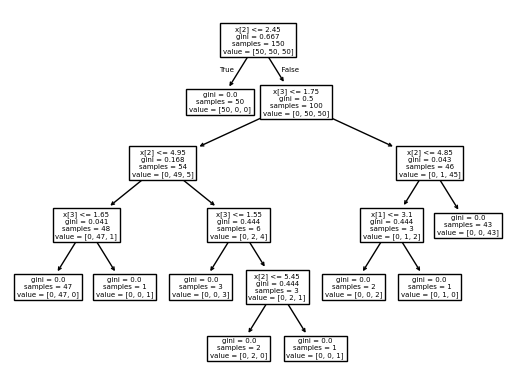

In [12]:
tree.plot_tree(clf) # this line of code plots the tree

In [22]:
# the above image is using the iris datasets dataset(s) to make a decision tree
# now I am going to make my own decision tree but not using iris datasets, I am going to be using my sports dataset to make a decision tree

In [67]:
# firstly I need to read in my dataset
import pandas as pd
dataset = "PremierLeagueSeason2024.csv"
read = pd.read_csv(dataset)

In [104]:
# now I need to find my target variable that I want predict
# XVAL is my dataframe(rows, cols), this is what I am using to try and predict from

data = ['goals_scored', 'goals_conceded', 'wins'] # this is what I am trying to predict from
XVAL = read[data] # this is my target colunm I am trying to predict

In [105]:
XVAL

,goals_scored,goals_conceded,wins
0,179,66,55
1,154,83,44
2,146,68,46
3,130,102,39
4,135,99,37
5,142,106,38
6,131,107,36
7,122,121,33
8,87,99,30
9,131,124,30


In [106]:
y = read['rank']

In [107]:
y

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
22    23
23    24
Name: rank, dtype: int64

In [108]:
# now I am going to display and show my decision tree
dtree = DecisionTreeClassifier()
dtree = dtree.fit(XVAL, y)

[Text(0.07692307692307693, 0.9772727272727273, 'wins <= 5.5\ngini = 0.958\nsamples = 24\nvalue = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1]'),
 Text(0.038461538461538464, 0.9318181818181818, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 1]'),
 Text(0.057692307692307696, 0.9545454545454546, 'True  '),
 Text(0.11538461538461539, 0.9318181818181818, 'goals_conceded <= 52.0\ngini = 0.957\nsamples = 23\nvalue = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 0]'),
 Text(0.09615384615384616, 0.9545454545454546, '  False'),
 Text(0.07692307692307693, 0.8863636363636364, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n1, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.15384615384615385, 0.8863636363636364, 'goals_conceded <= 59.5\ngini = 0.955\nsamples = 22\nvalue = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n0, 1, 1, 1, 1, 1, 1, 1, 1, 0]'),
 Text(0.11538461538461539,

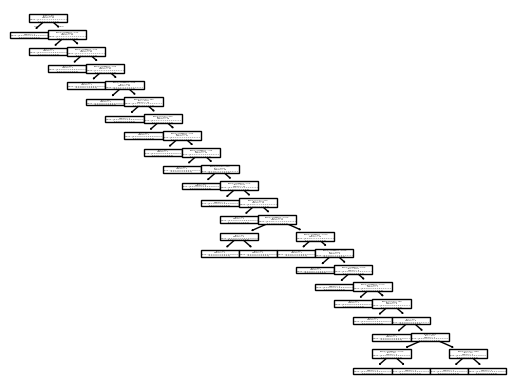

In [109]:
tree.plot_tree(dtree, feature_names=data)

In [110]:
# I have encountered a problem my above image is showing
# but it is not showing what is in the decision

# now I am going to try and fix this isssue

iris = datasets.load_iris()
XVAL = iris.data
y = iris.target

In [113]:
sportsTree = DecisionTreeClassifier()
sportsTree = sportsTree.fit(XVAL, y)

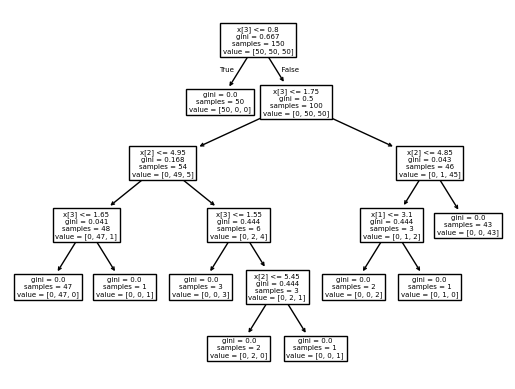

In [116]:
tree.plot_tree(sportsTree)
plt.show()

In [120]:
myTree = sportsTree.fit(XVAL, y)
# sportsTree = sportsTree.fit(XVAL, y)

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, '

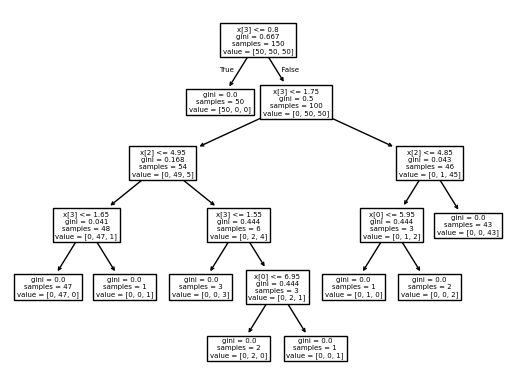

In [121]:
tree.plot_tree(myTree)